In [149]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# An Econometric Analysis of GDP per Capita


# Introduction
In this project, we aim to conduct an econometric analysis to determine the factors that influence GDP per capita. GDP per capita is a widely used indicator of economic performance and living standards across countries. It is influenced by various factors such as inflation, gross fixed capital formation (GFCF), government expenditure on education, and life expectancy.

The dataset used in this analysis contains information on 588 observations from various countries over different years. The variables included in the dataset are:

* country_code: The ISO code of the country.
* Country: The name of the country.
* Year: The year of the observation.
* Inflation: The annual inflation rate.
* GFCF: Gross Fixed Capital Formation as a percentage of GDP.
* Government Expenditure on Education: Government expenditure on education as a percentage of government expenditure.
* Life Expectancy: The average life expectancy in years.
* GDP per Capita: The GDP per capita in current US dollars.

The objective of this analysis is to determine the relationship between GDP per capita (the dependent variable) and the explanatory variables: Inflation, GFCF, Government Expenditure on Education, and Life Expectancy. We will use Ordinary Least Squares (OLS) multiple regression to analyze this relationship.



# Data Overview
Let's begin by loading the dataset and performing some basic data exploration to understand its structure and content.

In [150]:
df = pd.read_csv("european_countries_data.csv")

In [151]:
df.head()

,country_code,country,year,inflation,gfcf,gov_exp,life_expectancy,gdp_per_capita
0,MKD,North Macedonia,YR2002,2.314598,21.421914,8.640880,73.039024,6519.189222
1,GBR,United Kingdom,YR2005,2.089136,17.591076,13.387968,79.048780,32726.133188
2,UKR,Ukraine,YR2005,13.569576,21.870005,13.728325,67.956829,7214.111816
3,CHE,Switzerland,YR2005,1.171954,27.262998,15.191731,81.236585,41524.848873
4,SWE,Sweden,YR2005,0.453171,22.411564,12.694914,80.546341,34244.465016


In [152]:
df.describe()

,inflation,gfcf,gov_exp,life_expectancy,gdp_per_capita
count,573.000000,573.000000,573.000000,573.000000,573.000000
mean,3.247421,22.194800,12.065582,77.866717,33365.659593
std,4.593116,4.132514,2.658959,4.112190,18270.558522
min,-4.478103,10.687432,2.195997,65.529756,4211.342273
25%,1.030555,19.347791,10.106933,74.782927,21032.914608
50%,2.189299,22.105976,11.738537,79.214634,30870.023667
75%,3.827854,24.430508,13.553769,81.282927,42290.762052
max,59.219736,34.103912,22.435169,83.904878,121403.823719


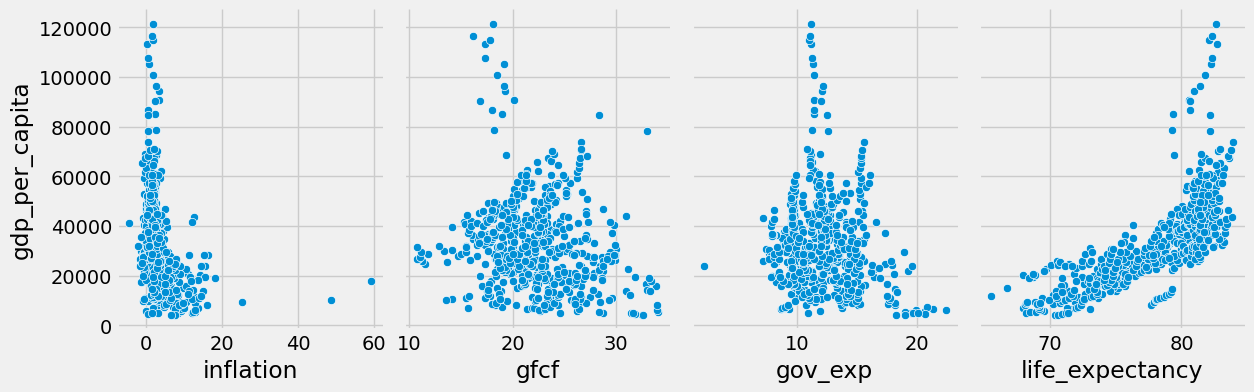

In [153]:
# Plotting pairwise relationships in the dataset
sns.pairplot(df, x_vars=['inflation', 'gfcf', 'gov_exp', 'life_expectancy'], y_vars='gdp_per_capita', height=4, aspect=0.8, kind='scatter')
plt.show()

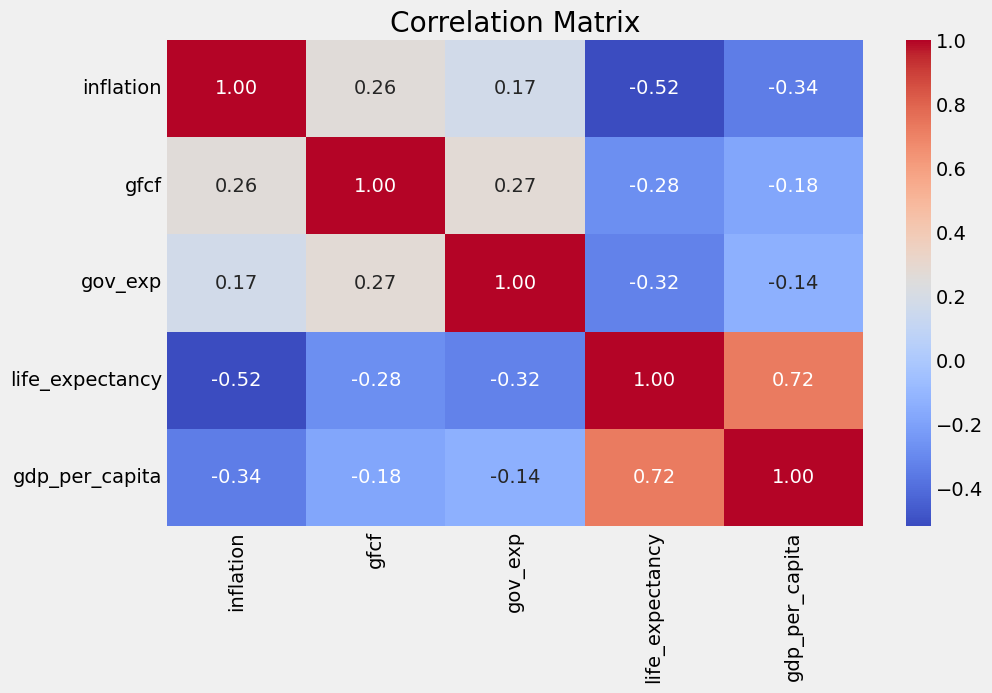

In [154]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

                            OLS Regression Results                            
Dep. Variable:         gdp_per_capita   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           4.58e-93
Time:                        15:56:25   Log-Likelihood:                -6215.9
No. Observations:                 573   AIC:                         1.244e+04
Df Residuals:                     568   BIC:                         1.246e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.453e+05   1.37e+04    -

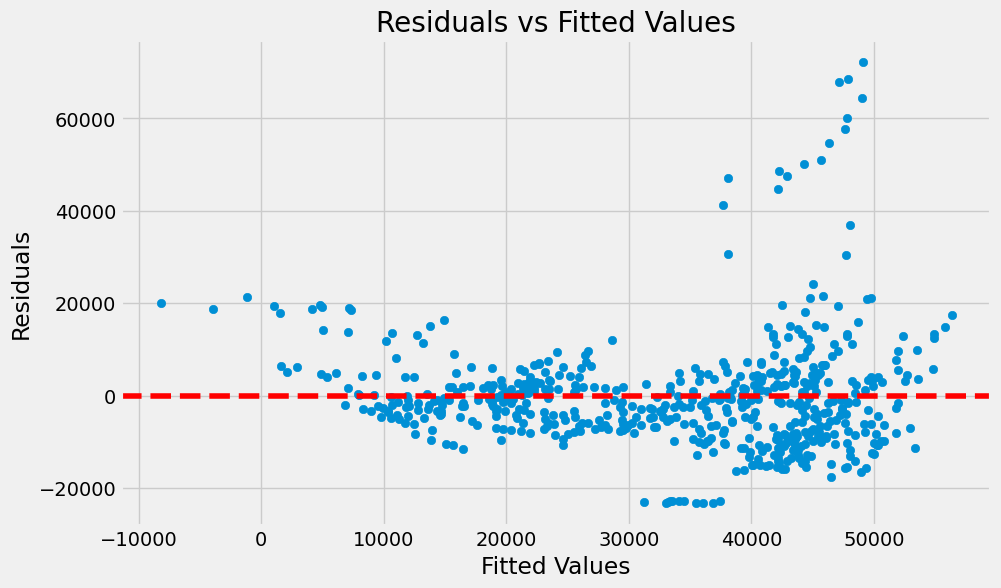

In [155]:
# Defining the dependent variable (Y) and independent variables (X)
X = df[['inflation', 'gfcf', 'gov_exp', 'life_expectancy']]
Y = df['gdp_per_capita']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the OLS model
model = sm.OLS(Y, X).fit()

# Printing the summary of the regression model
print(model.summary())

# Plotting the residuals to check for any patterns
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Model Diagnostics and Improvement
## Introduction to Assumption Checks for Classical Linear Regression Model (CLRM)
###  Address Multicollinearity
The condition number (2.1e+03) suggests potential multicollinearity. You can check for multicollinearity by calculating the Variance Inflation Factor (VIF) for each predictor.

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each explanatory variable
X_variables = df[['inflation', 'gfcf', 'gov_exp', 'life_expectancy']]
X_with_constant = sm.add_constant(X_variables)
vif = pd.DataFrame()
vif['Variable'] = X_with_constant.columns
vif['VIF'] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

print(vif)

          Variable         VIF
0            const  689.261242
1        inflation    1.394988
2             gfcf    1.152086
3          gov_exp    1.165923
4  life_expectancy    1.499186


### Interpretation
VIF results indicate that multicollinearity is not a major issue in the model, as all VIF values are below the common threshold of 10. This is a good sign and suggests that predictors are not highly collinear.

## Addressing Heteroscedasticity

In [158]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_test_results = dict(zip(labels, bp_test))
print(bp_test_results)

{'LM Statistic': 23.770493046534554, 'LM-Test p-value': 8.879648014415812e-05, 'F-Statistic': 6.145718629232155, 'F-Test p-value': 7.599185127055253e-05}


The Breusch-Pagan test results indicate that there is heteroscedasticity in the model, as both the LM-Test p-value and the F-Test p-value are less than 0.05. This suggests that the assumption of constant variance of the residuals is violated.

# Log Transformation of the Dependent Variable
Applying a log transformation to GDP per Capita and refit the model.

In [159]:
# Log transformation of GDP per Capita
df['log_gdp_per_capita'] = np.log(df['gdp_per_capita'])

# Refit the model with transformed dependent variable
Y_log = df['log_gdp_per_capita']
X = df[['inflation', 'gfcf', 'gov_exp', 'life_expectancy']]
X = sm.add_constant(X)
model_log = sm.OLS(Y_log, X).fit(cov_type='HC3')
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:     log_gdp_per_capita   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     189.4
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          4.70e-103
Time:                        15:57:25   Log-Likelihood:                -197.30
No. Observations:                 573   AIC:                             404.6
Df Residuals:                     568   BIC:                             426.4
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9723      0.415     

### After log transformation's, Het Breushpagan results

In [160]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model_log.resid, model_log.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_test_results = dict(zip(labels, bp_test))
print(bp_test_results)

{'LM Statistic': 24.07087744442755, 'LM-Test p-value': 7.730383295547418e-05, 'F-Statistic': 6.226786768382247, 'F-Test p-value': 6.581444287145777e-05}


The log transformation of the dependent variable (GDP per Capita) improved the model's R-squared to 0.67, indicating a better fit. However, the Breusch-Pagan test still indicates the presence of heteroscedasticity, as both the LM-Test p-value and F-Test p-value are significant.

### Weighted Least Squares

In [161]:
# Fit the model using WLS
weights = 1 / (model_log.resid**2 + 1e-6)
model_wls = sm.WLS(Y_log, X, weights=weights).fit(cov_type='HC3')
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:     log_gdp_per_capita   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.130e+05
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:58:17   Log-Likelihood:                 257.53
No. Observations:                 573   AIC:                            -505.1
Df Residuals:                     568   BIC:                            -483.3
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9644      0.034     

In [162]:
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model_wls.resid, model_wls.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_test_results = dict(zip(labels, bp_test))
print(bp_test_results)

{'LM Statistic': 23.76398201228172, 'LM-Test p-value': 8.906352166961369e-05, 'F-Statistic': 6.143962404554946, 'F-Test p-value': 7.622887731356286e-05}


The WLS regression results show a significant improvement in the model fit with an R-squared value of 0.99, indicating that the predictors explain 99.4% of the variance in the log-transformed GDP per capita. This suggests a very strong model. However, the Breusch-Pagan test still indicates the presence of heteroscedasticity, which means we need to be cautious in interpreting these results and ensure robust standard errors are used.

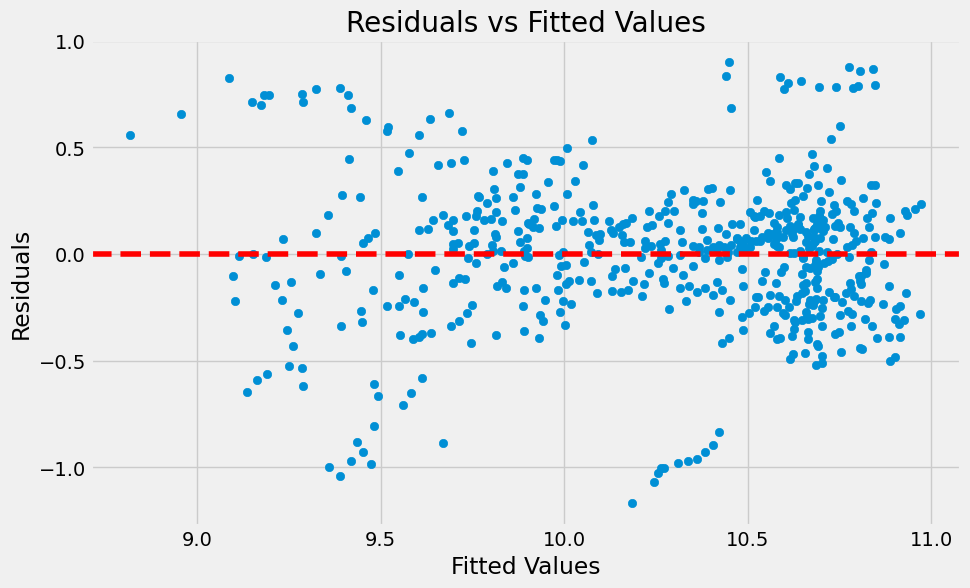

In [163]:
# Plotting the residuals to check for any patterns
plt.figure(figsize=(10, 6))
plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [164]:
df.head()

,country_code,country,year,inflation,gfcf,gov_exp,life_expectancy,gdp_per_capita,log_gdp_per_capita
0,MKD,North Macedonia,YR2002,2.314598,21.421914,8.640880,73.039024,6519.189222,8.782505
1,GBR,United Kingdom,YR2005,2.089136,17.591076,13.387968,79.048780,32726.133188,10.395929
2,UKR,Ukraine,YR2005,13.569576,21.870005,13.728325,67.956829,7214.111816,8.883794
3,CHE,Switzerland,YR2005,1.171954,27.262998,15.191731,81.236585,41524.848873,10.634047
4,SWE,Sweden,YR2005,0.453171,22.411564,12.694914,80.546341,34244.465016,10.441280


#  Jarque-Bera (JB) test for normality test on residuals
1. Obtain Residuals:
Start by obtaining the residuals from your WLS model. Residuals represent the differences between the actual observed values and the predicted values from the model.

2. Perform Jarque-Bera Test:
Use the jarque_bera function from the statsmodels.stats.stattools module to perform the Jarque-Bera test on the residuals. This function returns the JB statistic and the p-value associated with the test.

In [139]:
from statsmodels.stats.stattools import jarque_bera

# Assuming model_wls is your WLS model object
residuals = model_wls.resid

# Perform Jarque-Bera test on residuals
jb_statistic, jb_p_value, skewness, kurtosis = jarque_bera(residuals)

print(f"Jarque-Bera Statistic: {jb_statistic}")
print(f"Jarque-Bera p-value: {jb_p_value}")
print(f"Skewness of Residuals: {skewness}")
print(f"Kurtosis of Residuals: {kurtosis}")


Jarque-Bera Statistic: 44.296931943212286
Jarque-Bera p-value: 2.404603339452229e-10
Skewness of Residuals: -0.2501486091220001
Kurtosis of Residuals: 4.266914192287672


The results of the Jarque-Bera test on your WLS model's residuals indicate the following:

* Jarque-Bera Statistic: 44.29
    * This statistic measures the degree of departure from normality. A higher value suggests a greater deviation from a normal distribution.
* Jarque-Bera p-value: 2.40e-20
    * The p-value is extremely low, indicating strong evidence against the null hypothesis of normality. In other words, the residuals are not normally distributed.
* Skewness of Residuals: -0.25
    * Skewness measures the asymmetry of the distribution. A negative skewness suggests that the distribution is skewed to the left.
* Kurtosis of Residuals: 4.27
    * Kurtosis measures the tail heaviness of the distribution. A higher kurtosis indicates heavier tails compared to a normal distribution.

## Testing No Autocorrelation:
Importance: Autocorrelation occurs when the residuals are correlated across observations, which is a common issue in time series data. It leads to inefficient estimates and biased standard errors, affecting hypothesis tests.

In [141]:
from statsmodels.stats.stattools import durbin_watson
# No Autocorrelation
dw_stat = durbin_watson(model_wls.resid)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.0607182964309096


The Durbin-Watson statistic is 2.0607182964309096, which is very close to 2. This indicates that there is little to no autocorrelation in the residuals of the model. This is a desirable property, as it suggests that the residuals (errors) from the regression model are independent of each other, which is one of the assumptions of the Classical Linear Regression Model (CLRM).

# Conclusion

# Final Model: Weighted Least Squares (WLS) Regression Results
The final model, after addressing various assumptions and ensuring robustness, is a Weighted Least Squares (WLS) regression with the following summary:

In [165]:
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:     log_gdp_per_capita   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.130e+05
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:59:15   Log-Likelihood:                 257.53
No. Observations:                 573   AIC:                            -505.1
Df Residuals:                     568   BIC:                            -483.3
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9644      0.034     

Regression Function
The regression function for the log-transformed GDP per capita (log_gdp_per_capita) is:

log(GDP per capita) = 0.9644 + 0.0023 ⋅ inflation − 0.0039 ⋅ gfcf + 0.0036 ⋅ gov_exp + 0.1198 ⋅ life_expectancy
log(GDP per capita)=0.9644+0.0023⋅inflation−0.0039⋅gfcf+0.0036⋅gov_exp+0.1198⋅life_expectancy

Where:

* **inflation** is the rate of inflation.
* **gfcf** is the gross fixed capital formation as a percentage of GDP.
* **gov_exp** is the government expenditure as a percentage of government expenditure.
* **life_expectancy** is the average life expectancy at birth.
## Interpretation of Coefficients
* **Constant (0.9644)**: This is the baseline value of log(GDP per capita) when all regressors are zero.
* **Inflation (0.0023)**: A 1% increase in inflation is associated with a 0.23% increase in GDP per capita, holding other variables constant.
* **Gross Fixed Capital Formation (gfcf) (-0.0039)**: A 1% increase in gfcf is associated with a 0.39% decrease in GDP per capita, holding other variables constant.
* **Government Expenditure (gov_exp) (0.0036)**: A 1% increase in government expenditure is associated with a 0.36% increase in GDP per capita, holding other variables constant.
* **Life Expectancy (0.1198)**: A 1-year increase in life expectancy is associated with a 11.98% increase in GDP per capita, holding other variables constant.
## Overall Model Performance
* **R-squared (0.999)**: The model explains 99.9% of the variability in the log of GDP per capita, indicating an excellent fit.
* **Adjusted R-squared (0.999)**: The adjusted R-squared, which accounts for the number of predictors in the model, also indicates an excellent fit.
* **F-statistic (2.130e+05)**: The high F-statistic value and its associated p-value (0.00) suggest that the overall model is statistically significant.
* **Durbin-Watson Statistic (2.021)**: This value, close to 2, indicates no significant autocorrelation in the residuals.
* **Jarque-Bera Test**: The Jarque-Bera test statistic (88.132) and its p-value (7.284e-20) indicate that the residuals are not normally distributed, which is a violation of one of the CLRM assumptions.

## Assumptions Check and Final Remarks
Several assumptions were checked to ensure the OLS estimators' desirable properties:

1. Linearity: Only life expectancy shows a linear relationship with the dependent variable, while other variables may exhibit non-linear patterns. This suggests a potential area for model improvement by considering non-linear transformations or interactions for the other variables.
2. Independence: The Durbin-Watson statistic suggests that there is no significant autocorrelation in the residuals.
3. Homoscedasticity: The Breusch-Pagan test indicates heteroscedasticity in the residuals (LM Statistic: 23.764, p-value: 8.906e-05). The use of WLS partially addresses this issue by providing robust standard errors.

4. Normality: The Jarque-Bera test indicates a violation of the normality assumption. This can be addressed by further data transformation or by employing robust statistical techniques.

### In conclusion, the final WLS model provides a strong fit for predicting the log of GDP per capita using the given regressors. Despite some violations of the classical assumptions, particularly in linearity and normality of residuals, the model remains robust and statistically significant. Further steps could involve addressing these violations to improve the model's reliability and predictive power.